In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.04732376 0.036545   0.00354227 ... 0.00351318 0.01980334 0.00927798]
 [0.10499564 0.08108117 0.00785911 ... 0.00779458 0.04393701 0.02058475]
 [0.21078255 0.16277338 0.01577745 ... 0.0156479  0.08820513 0.04132464]
 ...
 [0.67918488 0.52448942 0.05083821 ... 0.05042077 0.28421515 0.13315651]
 [0.5939477  0.45866641 0.04445806 ... 0.044093   0.24854637 0.11644547]
 [0.23125626 0.17858387 0.01730995 ... 0.01716781 0.09677267 0.04533858]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.10537746 -0.11031978  0.0431012  ...  0.12709982 -0.05265064
  -0.15310596]
 [ 0.15187585  0.18204412 -0.06127393 ... -0.12271305  0.02882694
   0.07461007]
 [ 0.24506541  0.17804477 -0.16668837 ... -0.29190017  0.08700786
  -0.10499387]
 ...
 [ 0.75656722  0.42995704 -0.06033254 ...  0.0187713   0.17416855
   0.09728377]
 [ 0.57440153  0.40371727 -0.13587576 ...  0.05665203  0.31566566
   0.10432873]
 [ 0.19978543  0.05076363  0.08081153 ...  0.19306939  0.18971713
   0.11

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[-0.02124931  0.1094992  -0.42419517  0.11769337  0.2052658  -0.00076686
  0.17314199 -0.2819707   0.4134529   0.45067003 -0.09623123 -0.03826258
  0.2390514  -0.12570791 -0.22393261 -0.01694871 -0.01843327 -0.0853403
  0.14430614 -0.28536764 -0.16718295 -0.24444775  0.09293974  0.0692879
  0.12306497 -0.15796371  0.02339486 -0.0110984  -0.31710228  0.11513153
  0.08076186 -0.23777227 -0.01272847 -0.20172171  0.16707465 -0.01466184
  0.11005545 -0.08025914 -0.04645756  0.34280068  0.09676294 -0.00569466
 -0.07111561 -0.00086184 -0.06694689  0.03217486  0.1099863   0.05860982
 -0.08876659 -0.10555102]
[ 0.11282287 -0.10847559  0.19965129  0.12049523  0.02040822  0.05800208
  0.22545047 -0.1357771  -0.1830312  -0.135954    0.18426304  0.3995862
  0.01430885  0.01433027  0.01223664  0.12889874 -0.13047646 -0.15361136
  0.14472322  0.11034036  0.18096201  0.26575935 -0.11473424 -0.2298935
 -0.0860258  -0.12759331 -0.22198474  0.08437586  0.00821502  0.15613243
 -0.13543877 -0.16469368  0.0

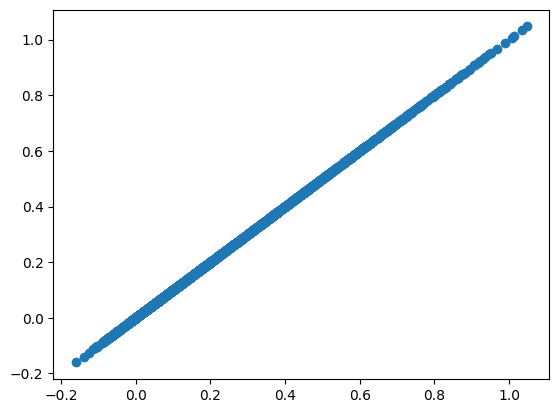

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

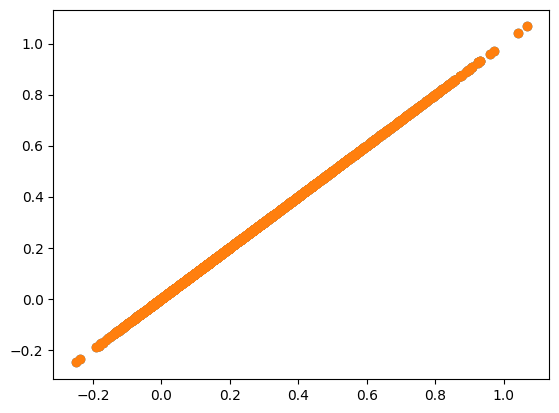

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417],
       [142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417],
       [142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417],
       ...,
       [142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417],
       [142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417],
       [142.82417, 142.82417, 142.82417, ..., 142.82417, 142.82417,
        142.82417]], shape=(50, 40), dtype=float32)

In [ ]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000001D9A3EDA0E0>


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([ 1.5859965 ,  1.1176713 ,  0.11849873,  0.13137507,  0.73406416,
         1.088245  ,  1.4776524 ,  0.4029925 , -0.00298698,  0.4214385 ,
         1.2676787 ,  0.45997685,  0.6443121 ,  0.8894728 ,  0.0744637 ,
         0.6858877 ,  0.3081898 ,  1.0808494 ,  1.3553795 ,  1.1794759 ,
         0.9360357 ,  0.33898288,  0.0744409 ,  0.6745495 ,  0.16377419,
         0.29624996,  0.74248767,  0.4142952 ,  0.94065976,  0.19301413,
         1.3295372 ,  1.0183787 ,  0.40773582,  1.2307969 ,  1.3019614 ,
         1.279366  ,  0.82399005,  0.15114747,  0.66330016,  0.2982433 ],
       dtype=float32),
 array([0.02974704, 0.02974704, 0.02974704, 0.02974704, 0.02974704,
        0.02974704, 0.02974704, 0.02974704, 0.02974704, 0.02974704,
        0.02974704, 0.02974704, 0.02974704, 0.02974704, 0.02974704,
        0.02974704, 0.02974704, 0.02974704, 0.02974704, 0.02974704,
        0.02974704, 0.02974704, 0.02974704, 0.02974704, 0.02974704,
        0.02974704, 0.02974704, 0.02974704, 0.029747

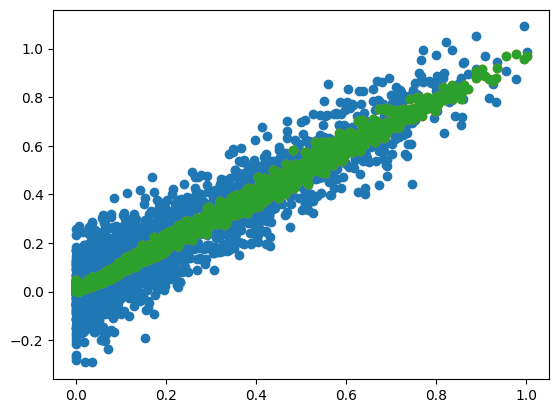

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


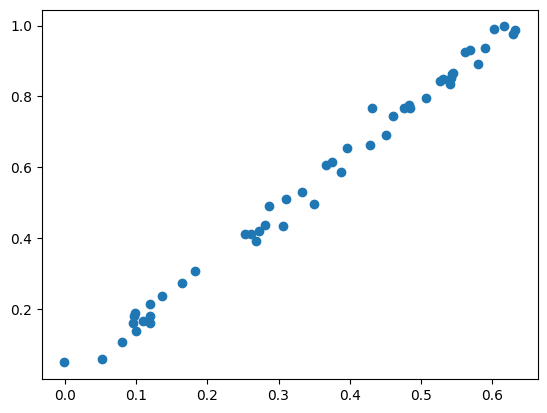

In [12]:
plt.scatter(mycebmf.L[:,0], u)

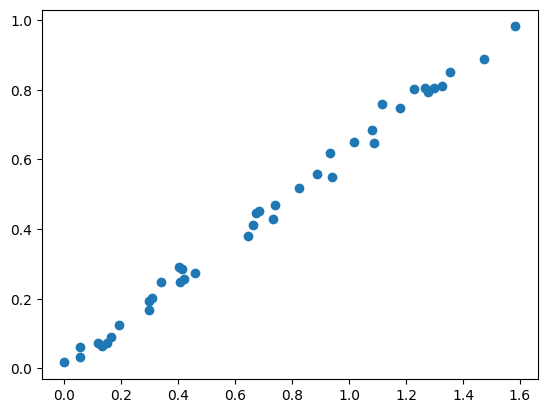

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([-3.1111391e-10,  1.6106095e-09, -6.8789681e-09,  1.7312485e-09,
        3.0568590e-09, -1.6797702e-11,  2.5655988e-09, -4.3061137e-09,
        6.6482322e-09,  7.4166482e-09, -1.4249431e-09, -5.6832816e-10,
        3.5881895e-09, -1.8642861e-09, -3.3710819e-09, -2.4909064e-10,
       -2.7448119e-10, -1.2651646e-09,  2.1283639e-09, -4.3615214e-09,
       -2.4856703e-09, -3.6909387e-09,  1.3643432e-09,  1.0147856e-09,
        1.8033665e-09, -2.3502333e-09,  3.4080144e-10, -1.7236296e-10,
       -4.8904298e-09,  1.6898813e-09,  1.1770215e-09, -3.5916257e-09,
       -1.9619339e-10, -3.0155214e-09,  2.4717581e-09, -2.1664444e-10,
        1.6139181e-09, -1.1893379e-09, -6.8601497e-10,  5.3340004e-09,
        1.4178633e-09, -9.2606485e-11, -1.0548536e-09, -1.4803457e-11,
       -9.8935871e-10,  4.6416535e-10,  1.6104059e-09,  8.5112706e-10,
       -1.3110413e-09, -1.5558790e-09], dtype=float32)

In [20]:
for i in range(40):
    mycebmf.iter()

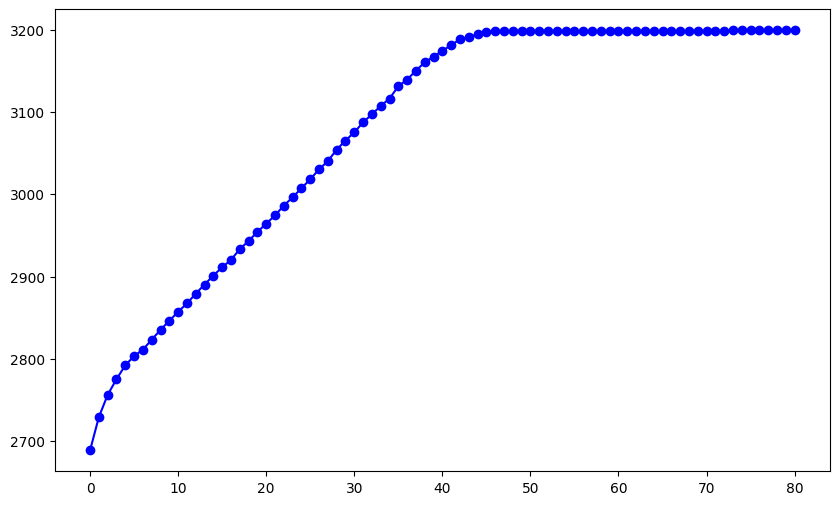

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

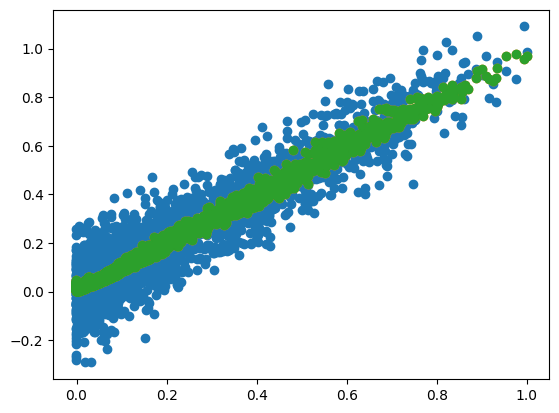

In [22]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [24]:
mycebmf.L
 

array([[-0.00111364,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.08431321,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.12454555,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.17109782,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5534681 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.3189176 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.32342145,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.49603656,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.4808465 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58546096,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.56636864,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.4467961 ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.59343344,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.567899  ,  0.        ,  0. 